# The basics

##  Basic operations

### Unary operations

- Many unary operations,
  such as computing the sum of all the elements in the array,
  are implemented as methods of the `ndarray` class.
- By default, these operations apply to the array
  as though it were a list of numbers, regardless of its shape.
- However, by specifying the `axis` parameter
  you can apply an operation along the specified axis of an array.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a 2d array by reshaping 1d one
# based on the arithmetic progression.
x_min, x_step, x_shape = 1, 1, (3, 4)
x_max = x_min + x_step * (np.product(x_shape) - 1)
x = np.arange(
    start=x_min,
    stop=x_max + x_step,
    step = x_step
).reshape(x_shape)

# Apply min, max and sum methods
# to the whole 2d array.
print(f'{type(x)}:\n{x}',
      f'min: {x.min()}',
      f'max: {x.max()}',
      f'sum: {x.sum()}',
      sep='\n', end='\n\n')

# Apply min, max, sum and cumsum methods
# to 2d array along the specified axis.
for i in range(x.ndim):
    print(f'axis: {i}',
          f'min: {x.min(axis=i)}',
          f'max: {x.max(axis=i)}',
          f'sum: {x.sum(axis=i)}',
          f'cumsum:', x.cumsum(axis=i),
          sep='\n', end='\n\n')

<class 'numpy.ndarray'>:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
min: 1
max: 12
sum: 78

axis: 0
min: [1 2 3 4]
max: [ 9 10 11 12]
sum: [15 18 21 24]
cumsum:
[[ 1  2  3  4]
 [ 6  8 10 12]
 [15 18 21 24]]

axis: 1
min: [1 5 9]
max: [ 4  8 12]
sum: [10 26 42]
cumsum:
[[ 1  3  6 10]
 [ 5 11 18 26]
 [ 9 19 30 42]]



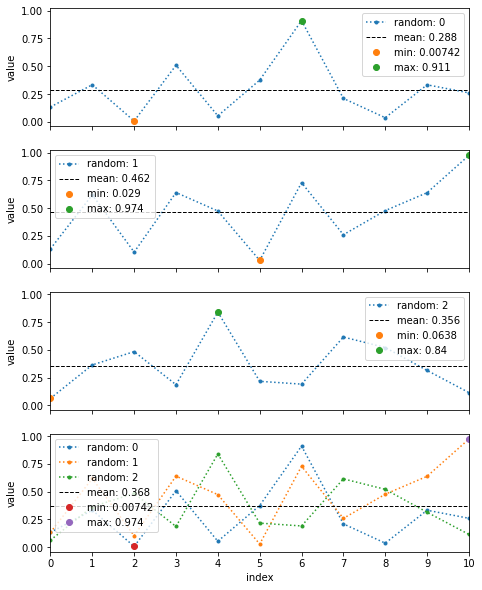

In [3]:
# Create a 2d array of randoms.
x = np.random.random((3, 11))

# Apply mean, min and max methods
# to 2d array along axis-0 and
# to the whole array.

fig, ax = plt.subplots(
    nrows=x.shape[0] + 1, ncols=1,
    sharex=True, sharey=True
)

for i in range(x.shape[0]):
    ax[i].plot(x[i], '.:', label=f'random: {i}')

    ax[i].plot(
        [0, x.shape[1] - 1], [x[i].mean(), x[i].mean()],
        '--', c='k', lw=1,
        label=f'mean: {x[i].mean():.3}'
    )
    ax[i].plot(
        x[i].argmin(), x[i].min(),
        'o',
        label=f'min: {x[i].min():.3}'
    )
    ax[i].plot(
        x[i].argmax(), x[i].max(),
        'o',
        label=f'max: {x[i].max():.3}'
    )
    
    ax[i].set_ylabel('value')
    ax[i].legend()
    
for i in range(x.shape[0]):
    ax[x.shape[0]].plot(x[i], '.:', label=f'random: {i}')

ax[x.shape[0]].plot(
    [0, x.shape[1] - 1], [x.mean(), x.mean()],
    '--', c='k', lw=1,
    label=f'mean: {x.mean():.3}'
)
ax[x.shape[0]].plot(
    x.argmin() % x.shape[1], x.min(),
    'o',
    label=f'min: {x.min():.3}'
)
ax[x.shape[0]].plot(
    x.argmax() % x.shape[1], x.max(),
    'o',
    label=f'max: {x.max():.3}'
)

ax[x.shape[0]].set_xlabel('index')
ax[x.shape[0]].set_ylabel('value')
ax[x.shape[0]].legend()

plt.xlim(0, x.shape[1] - 1)
plt.xticks(np.arange(x.shape[1]))

fig.set_size_inches(
    2.5 * np.array(
        (3, (x.shape[0] + 1))
    )
)

plt.show()